<a href="https://colab.research.google.com/github/Bjoshua25/PREDICTION-OF-FUTURE-FARM-YIELD/blob/main/Prediction_of_Farm_Yield_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In this project, we will be using the `crop_yield_dataset` which consists of observations on `Temperature` (independent variable) and the corresponding `Crop_Yield` (dependent variable). Temperature is measured in degrees and crop yield is measured in units specific to the crop being studied.

### Import libraries and dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# Load dataset
df= pd.read_csv("https://raw.githubusercontent.com/Explore-AI/Public-Data/master/Data/Python/crop_yield_dataset.csv")
df.head(5)

,Temperature,Crop_Yield
0,27.483571,58.922301
1,24.308678,44.070420
2,28.238443,63.490857
3,32.615149,58.221043
4,23.829233,50.592752


## Exploratory Data Analysis (EDA)

This section explores the dataset to understand its structure, distributions, and relationships.

In [ ]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  120 non-null    float64
 1   Crop_Yield   120 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [ ]:
# Summary statistics
df.describe()

,Temperature,Crop_Yield
count,120.000000,120.000000
mean,24.604155,49.580131
std,4.626583,10.975299
min,11.901274,24.409459
25%,22.140623,42.875481
50%,24.633860,49.548066
75%,26.913931,56.533272
max,37.316211,74.396332


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Temperature,0
Crop_Yield,0


### Data Distribution Analysis

<Figure size 1000x500 with 0 Axes>

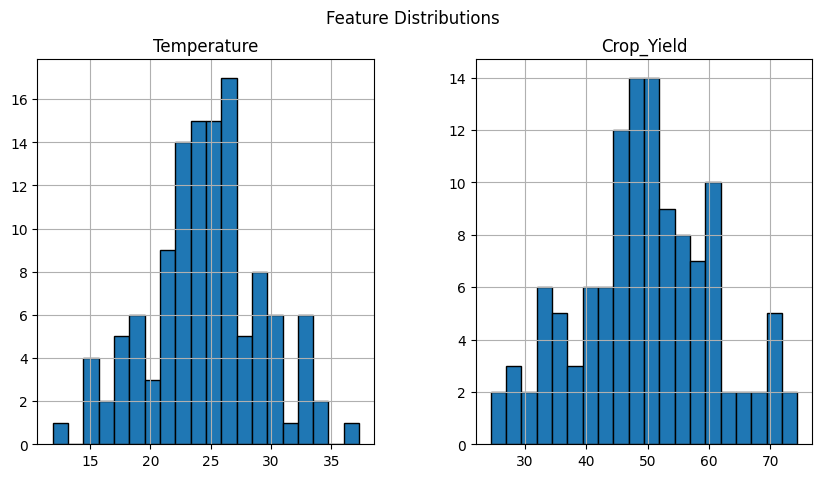

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(10, 5))
df.hist(bins=20, figsize=(10,5), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

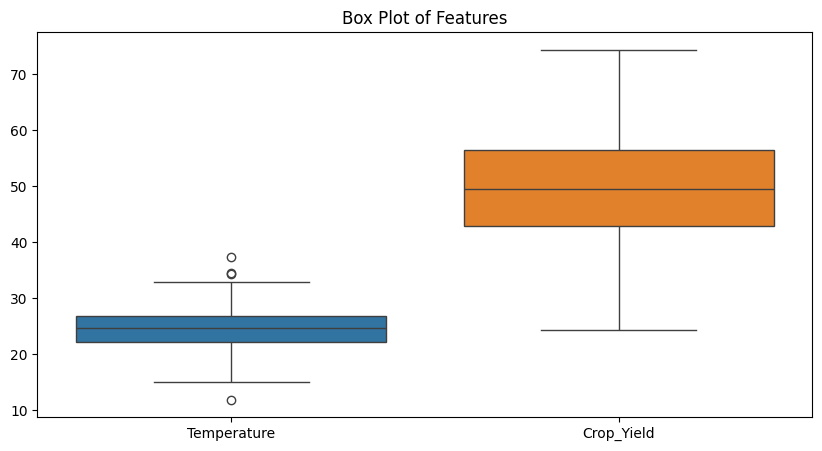

In [ ]:
# Box plots to check for outliers
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title('Box Plot of Features')
plt.show()

### Feature Relationships and Correlations

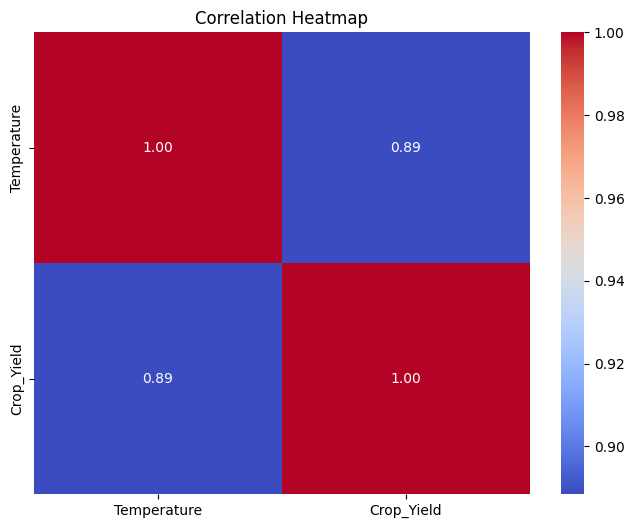

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

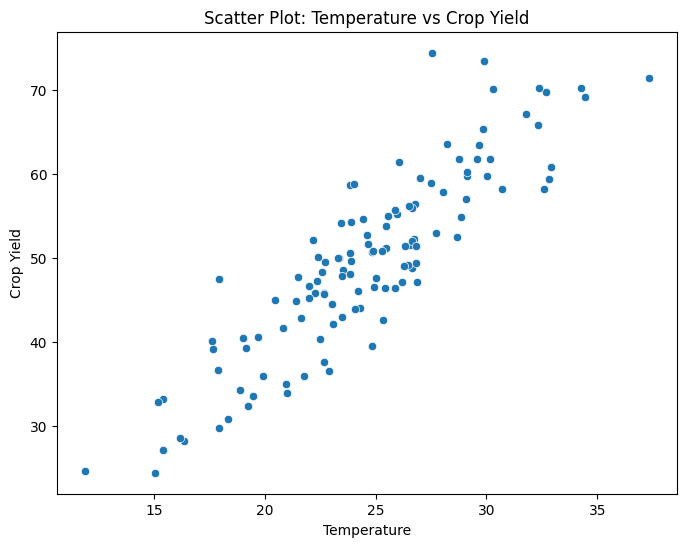

In [ ]:
# Scatter plot to visualize relationship between Temperature and Crop Yield
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Temperature'], y=df['Crop_Yield'])
plt.xlabel('Temperature')
plt.ylabel('Crop Yield')
plt.title('Scatter Plot: Temperature vs Crop Yield')
plt.show()

### Residual Analysis (After Linear Regression)

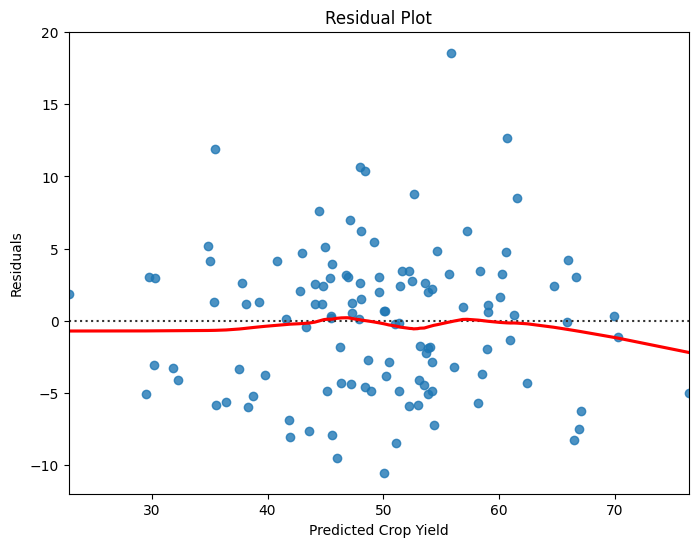

In [ ]:
# Fitting the regression model
X = df[['Temperature']]
y = df['Crop_Yield']
model = LinearRegression()
model.fit(X, y)

# Predicting residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Residual plot
plt.figure(figsize=(8,6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Predicted Crop Yield')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

### Data Preprocessing

In [ ]:
# Split dataset into features and response variable
X = df[['Temperature']]
y = df['Crop_Yield']

X is a DataFrame containing only the `Temperature` column, which serves as the predictor variable.

y is a Series containing the `Crop_Yield` column, which serves as the response or target variable.

### Data Split

In [ ]:
# Perform train-test split with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We use the `train_test_split` function to divide the dataset into training and testing sets for both the features (X) and the response variable (y).

The `0.2` test_size indicates that 20% of the data will be used for testing, while the remaining 80% will be used for training.

We use a random_state of `42` to ensure reproducibility of the split.

### Training Linear Model

In [ ]:
# Create an instance of the LinearRegression class
lm = LinearRegression()

# Train the linear regression model
lm.fit(X_train, y_train)

LinearRegression()

We create a LinearRegression object and fit it to the training data only which includes the independent variables: `X_train` and the dependent variables: `y_train`.

### Evaluation of Model on Training Data

In [ ]:
# Generate predictions on the training set
y_train_pred = lm.predict(X_train)

# Calculate the Mean Squared Error (MSE)
train_mse = metrics.mean_squared_error(y_train, y_train_pred)

# Calculate the R-squared
train_r2 = metrics.r2_score(y_train, y_train_pred)

# Print the training MSE and R-squared score
print("Training MSE:", train_mse)
print("Training R-squared:", train_r2)

Training MSE: 22.152323850480098
Training R-squared: 0.8025918031520605


We first ask the trained linear regression model to generate predictions on the training set of predictors `X_train`.

We then pass the actual target values `y_train` and the predicted target values `y_train_pred` to the `metrics.mean_squared_error()` and the `metrics.r2_score()` functions to calculate the respective metrics.

### Evaluation of Model on Test Split Data

In [ ]:
# Generate predictions on the testing set
y_test_pred = lm.predict(X_test)

# Calculate the Mean Squared Error (MSE)
test_mse = metrics.mean_squared_error(y_test, y_test_pred)

# Calculate the R-squared
test_r2 = metrics.r2_score(y_test, y_test_pred)

# Print the testing MSE and R-squared score
print("Testing MSE:", test_mse)
print("Testing R-squared:", test_r2)

Testing MSE: 37.75854546183867
Testing R-squared: 0.7167858892114612


We first ask the trained linear regression model to generate predictions on the testing set of predictors `X_test`.

We then pass the actual target values `y_test` and the predicted target values `y_test_pred` to the `metrics.mean_squared_error()` and the `metrics.r2_score()` functions to calculate the respective metrics.

It is worth experimenting with different random states once we have completed the exercise (Try random_state = 50). How do the R-squared and MSE metrics change between the test and training sets? Does the gap get smaller or larger? What does this suggest? Could the relatively small number of observations be affecting these metrics?

## Key Observations

- The test error (MSE) is higher than the training error, but the difference is not extreme.

- R² has dropped from 0.8 (train) to 0.71 (test), indicating some reduction in predictive power, but it still explains 71% of the variance in the test data.

- The model might have a slight overfitting issue since it performs better on the training data than on the test data, but it's not a severe case of overfitting.